In [1]:
import tensorflow as tf
tf.VERSION

'1.15.0'

In [4]:
import bert
from bert import run_classifier
from bert import optimization
from bert import tokenization
from bert import modeling
import tensorflow as tf
import numpy as np
import itertools
import os

In [5]:
os.listdir('/Users/patsnap/Desktop/Neo4J_and_other_codes/Coronavirus_19/CORD-19-research-challenge/')

['.DS_Store',
 'custom_license',
 'corpus-paper-anno',
 'metadata.readme',
 'json_schema.txt',
 'noncomm_use_subset',
 'cord19_specter_embeddings_2020-04-10',
 'corpus-paper-annoformat',
 'metadata.csv',
 'biorxiv_medrxiv',
 'COVID.DATA.LIC.AGMT.pdf',
 'comm_use_subset']

In [7]:
with open('/Users/patsnap/Desktop/Neo4J_and_other_codes/Coronavirus_19/CORD-19-research-challenge/metadata.readme', 'r') as f:
    data = f.read()
    print(data)

(1) Metadata for papers from these sources are combined: CZI, PMC, BioRxiv/MedRxiv. (total records 29500)
	- CZI 1236 records
	- PMC 27337
	- bioRxiv 566
	- medRxiv 361
(2) 17K of the paper records have PDFs and the hash of the PDFs are in 'sha'
(3) For PMC sourced papers, one paper's metadata can be associated with one or more PDFs/shas under that paper - a PDF/sha correponding to the main article, and possibly additional PDF/shas corresponding to supporting materials for the article.
(4)	13K of the PDFs were processed with fulltext ('has_full_text'=True)
(5) Various 'keys' are populated with the metadata:
	- 'pmcid': populated for all PMC paper records (27337 non null)
	- 'doi': populated for all BioRxiv/MedRxiv paper records and most of the other records (26357 non null)
	- 'WHO #Covidence': populated for all CZI records and none of the other records (1236 non null)
	- 'pubmed_id': populated for some of the records
	- 'Microsoft Academic Paper ID': populated for some of the records


In [ ]:
#MAking CSv from Json - an example

In [8]:
import os
import json
from pprint import pprint
from copy import deepcopy

import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [9]:
biorxiv_dir = '/Users/patsnap/Desktop/Neo4J_and_other_codes/Coronavirus_19/CORD-19-research-challenge/biorxiv_medrxiv/biorxiv_medrxiv/pdf_json/'
filenames = os.listdir(biorxiv_dir)
print("Number of articles retrieved from biorxiv:", len(filenames))

Number of articles retrieved from biorxiv: 2490


In [10]:
all_files = []

for filename in filenames:
    filename = biorxiv_dir + filename
    file = json.load(open(filename, 'rb'))
    all_files.append(file)

In [11]:
file = all_files[0]
print("Dictionary keys:", file.keys())

Dictionary keys: dict_keys(['paper_id', 'metadata', 'abstract', 'body_text', 'bib_entries', 'ref_entries', 'back_matter'])


In [19]:
def format_body(series):
    texts = [(di['section'], di['text']) for di in series]
    texts_di = {di['section']: "" for di in series}
    for section, text in texts:
        texts_di[section] += text
    body = ""
    for section, text in texts_di.items():
        body += section
        body += "\n\n"
        body += text
        body += "\n\n"
    return body

In [23]:
for di in file['metadata']['authors']:
    print(di)

{'first': 'Michael', 'middle': [], 'last': 'Liebrenz', 'suffix': '', 'affiliation': {'laboratory': '', 'institution': 'University of Bern', 'location': {'settlement': 'Bern', 'country': 'Switzerland'}}, 'email': ''}
{'first': 'Dinesh', 'middle': [], 'last': 'Bhugra', 'suffix': '', 'affiliation': {}, 'email': ''}
{'first': 'Anna', 'middle': [], 'last': 'Buadze', 'suffix': '', 'affiliation': {'laboratory': '', 'institution': 'University of Zurich', 'location': {'settlement': 'Zurich', 'country': 'Switzerland'}}, 'email': ''}
{'first': 'Roman', 'middle': [], 'last': 'Schleifer', 'suffix': '', 'affiliation': {'laboratory': '', 'institution': 'University of Bern', 'location': {'settlement': 'Bern', 'country': 'Switzerland'}}, 'email': ''}


In [29]:
def format_authors(series):
    new_list = []
    if with_affiliation == False:
        for di in series:
            new_list.append(di['first']+ " " + di['last'])
        return ", ".join(new_list)

In [ ]:
#https://www.kaggle.com/xhlulu/cord-19-eda-parse-json-and-generate-clean-csv#Biorxiv:-Metadata

In [34]:
cleaned_files = []

for file in tqdm(all_files):
    features = [
        file['paper_id'],
        file['metadata']['title'],
        format_authors(file['metadata']['authors']),
        format_body(file['abstract']),
        format_body(file['body_text']),
#        format_bib(file['bib_entries']),
        file['metadata']['authors'],
        file['bib_entries']
    ]
    
    cleaned_files.append(features)

In [37]:
col_names = [
    'paper_id', 
    'title', 
    'authors', 
    'abstract', 
    'text', 
    'raw_authors',
    'raw_bibliography'
]

clean_df = pd.DataFrame(cleaned_files, columns=col_names)
clean_df.head()

,paper_id,title,authors,abstract,text,raw_authors,raw_bibliography
0,b2f67d533f2749807f2537f3775b39da3b186051,Caring for persons in detention suffering with...,"Michael Liebrenz, Dinesh Bhugra, Anna Buadze, ...",,\n\nThere is a disproportionate number of indi...,"[{'first': 'Michael', 'middle': [], 'last': 'L...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Influen..."
1,ad98979eada6e333a276d39efdce21779d538625,Xanthine-based acyclic nucleoside phosphonates...,"Ond Rej Baszczy Nski, Martin Kaiser, Michal Ce...",Abstract\n\nWhile noncanonic xanthine nucleoti...,Introduction\n\nThe concentration and ratio of...,"[{'first': 'Ond', 'middle': [], 'last': 'Rej B...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Absolut..."
2,464f7d3a460eb51dbc25bd12639b22079a73f85a,Viral lncRNA: A regulatory molecule for contro...,"Ziqiang Wang, Yiwan Zhao, Yaou Zhang",Abstract\n\nLong non-coding RNAs (lncRNAs) are...,Introduction\n\nViruses are important infectio...,"[{'first': 'Ziqiang', 'middle': [], 'last': 'W...","{'BIBREF0': {'ref_id': 'b0', 'title': 'The cha..."
3,c436139975d97ef929b5d8452595de40bda0c11c,"Phone: (1) 301-451-9881, jbeigel@niaid.nih.gov","John Beigel, Pablo Tebas, Marie-Carmelle Elie-...",Abstract\n\non behalf of the IRC002 Study Team...,INTRODUCTION\n\nPandemic influenza remains a g...,"[{'first': 'John', 'middle': ['H'], 'last': 'B...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Meta-an..."
4,634128ea7d7736750e1c3cd0a48bb37843d06dac,A Strategy To Estimate Unknown Viral Diversity...,"Simon Anthony, Jonathan Epstein, Kris Murray, ...",Abstract\n\nThe majority of emerging zoonoses ...,"Viral discovery.\n\nA total of 12,793 consensu...","[{'first': 'Simon', 'middle': ['J'], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Factors..."


In [38]:
biorxiv_clean = pd.read_csv('/Users/patsnap/Desktop/Neo4J_and_other_codes/Coronavirus_19/CORD-19-research-challenge/biorxiv_clean.csv')
clean_comm_use = pd.read_csv('/Users/patsnap/Desktop/Neo4J_and_other_codes/Coronavirus_19/CORD-19-research-challenge/clean_comm_use.csv')
clean_noncomm_use =  pd.read_csv('/Users/patsnap/Desktop/Neo4J_and_other_codes/Coronavirus_19/CORD-19-research-challenge/clean_noncomm_use.csv')
clean_pmc =  pd.read_csv('/Users/patsnap/Desktop/Neo4J_and_other_codes/Coronavirus_19/CORD-19-research-challenge/clean_pmc.csv')

In [46]:
!pip install rake-nltk

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7821 sha256=7ee6714e9bfd6070387ae597d4aaedfb039ca02f65d0e4411b441aaabeed2337
  Stored in directory: /Users/patsnap/Library/Caches/pip/wheels/7c/d9/8a/b8a9244fa89a07f288f9fe006aafc79d93fceb58496c29b606
Successfully built rake-nltk


In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.cluster import DBSCAN
from nltk.corpus import stopwords
from spacy.matcher import Matcher 
from collections import  Counter
import matplotlib.pyplot as plt
from spacy.tokens import Span 
import tensorflow_hub as hub
from rake_nltk import Rake
import tensorflow as tf
import pyLDAvis.gensim
from tqdm import tqdm
import seaborn as sns
import networkx as nx
import pandas as pd
import numpy as np
import pyLDAvis
import gensim
import spacy
import os
import gc

/Users/patsnap/anaconda2/lib/python3.7/site-packages/gensim/corpora/dictionary.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, defaultdict
/Users/patsnap/anaconda2/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [65]:
from gensim import corpora

In [47]:
path="/Users/patsnap/Desktop/Neo4J_and_other_codes/Coronavirus_19/CORD-19-research-challenge/"
all_sources=pd.read_csv(path+"metadata.csv")

In [53]:
all_sources.dropna(inplace= True)
all_sources.isna().sum()

cord_uid                       0
sha                            0
source_x                       0
title                          0
doi                            0
pmcid                          0
pubmed_id                      0
license                        0
abstract                       0
publish_time                   0
authors                        0
journal                        0
Microsoft Academic Paper ID    0
WHO #Covidence                 0
has_pdf_parse                  0
has_pmc_xml_parse              0
full_text_file                 0
url                            0
dtype: int64

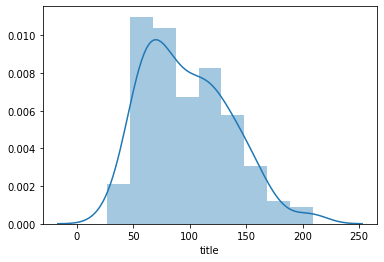

In [54]:
#title length distribution
headline_length=all_sources['title'].str.len()
sns.distplot(headline_length)
plt.show()

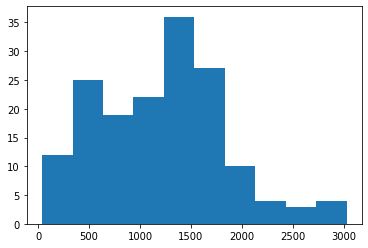

In [55]:
#Abstract length distribution
headline_length=all_sources['abstract'].str.len()
plt.hist(headline_length)
plt.show()

In [61]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  

data_words = list(sent_to_words(all_sources["abstract"].tolist()))

print(data_words[:1])

[['abstract', 'novel', 'coronavirus', 'designated', 'as', 'ncov', 'hit', 'the', 'central', 'chinese', 'city', 'of', 'wuhan', 'in', 'late', 'december', 'and', 'subsequently', 'spread', 'rapidly', 'to', 'all', 'provinces', 'of', 'china', 'and', 'multiple', 'countries', 'as', 'of', 'am', 'february', 'total', 'of', 'cases', 'have', 'been', 'confirmed', 'infection', 'of', 'ncov', 'in', 'china', 'mainland', 'and', 'cases', 'have', 'also', 'been', 'cumulatively', 'reported', 'from', 'countries', 'according', 'to', 'the', 'latest', 'data', 'total', 'of', 'deaths', 'occurred', 'in', 'china', 'mainland', 'with', 'the', 'mortality', 'reaching', 'approximately', 'at', 'present', 'there', 'is', 'no', 'vaccine', 'or', 'specific', 'drugs', 'for', 'the', 'human', 'coronavirus', 'therefore', 'it', 'is', 'critical', 'to', 'understand', 'the', 'nature', 'of', 'the', 'virus', 'and', 'its', 'clinical', 'characteristics', 'in', 'order', 'to', 'respond', 'to', 'the', 'ncov', 'outbreak', 'thus', 'the', 'prese

In [62]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=20) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=20)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [63]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

['the', 'novel_coronavirus_ncov', 'infection', 'caused', 'pneumonia', 'we', 'retrospectively', 'analyzed', 'the', 'virus', 'presence', 'in', 'the', 'pharyngeal', 'swab', 'blood', 'and', 'the', 'anal', 'swab', 'detected', 'by', 'real_time', 'pcr', 'in', 'the', 'clinical', 'lab', 'unexpectedly', 'the', 'ncov', 'rna', 'was', 'readily', 'detected', 'in', 'the', 'blood', 'of', 'patients', 'and', 'the', 'anal', 'swabs', 'of', 'patients', 'importantly', 'all', 'of', 'the', 'patients', 'with', 'detectable', 'viral', 'rna', 'in', 'the', 'blood', 'cohort', 'progressed', 'to', 'severe', 'symptom', 'stage', 'indicating', 'strong', 'correlation', 'of', 'serum', 'viral', 'rna', 'with', 'the', 'disease', 'severity', 'value', 'meanwhile', 'of', 'the', 'patients', 'with', 'annal', 'swab', 'virus', 'positive', 'was', 'in', 'severe', 'clinical', 'stage', 'however', 'the', 'concentration', 'of', 'viral', 'rna', 'in', 'the', 'anal', 'swab', 'ct', 'value', 'was', 'higher', 'than', 'in', 'the', 'blood', 'ct'

In [67]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 4), (6, 1), (7, 2), (8, 1), (9, 2), (10, 1), (11, 2), (12, 2), (13, 1), (14, 1), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 4), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 1), (48, 4), (49, 1), (50, 1), (51, 1), (52, 1), (53, 7), (54, 1), (55, 1), (56, 1), (57, 1), (58, 2), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 10), (71, 1), (72, 1), (73, 1), (74, 1), (75, 5), (76, 2), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1)]]


In [68]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abstract', 1),
  ('according', 1),
  ('all', 1),
  ('also', 1),
  ('am', 1),
  ('and', 4),
  ('approximately', 1),
  ('as', 2),
  ('at', 1),
  ('been', 2),
  ('briefly', 1),
  ('but', 2),
  ('cases', 2),
  ('central', 1),
  ('characteristics', 1),
  ('china', 3),
  ('chinese', 1),
  ('city', 1),
  ('clinical', 1),
  ('comprehensively', 1),
  ('confirmed', 1),
  ('coronavirus', 2),
  ('countries', 2),
  ('critical', 1),
  ('cumulatively', 1),
  ('data', 1),
  ('deaths', 1),
  ('december', 1),
  ('designated', 1),
  ('drugs', 1),
  ('february', 1),
  ('for', 1),
  ('from', 1),
  ('have', 2),
  ('hit', 1),
  ('human', 1),
  ('in', 4),
  ('infection', 1),
  ('is', 2),
  ('it', 1),
  ('its', 1),
  ('late', 1),
  ('latest', 1),
  ('mainland', 2),
  ('mortality', 1),
  ('much', 1),
  ('multiple', 1),
  ('nature', 1),
  ('ncov', 4),
  ('no', 1),
  ('not', 1),
  ('novel', 1),
  ('occurred', 1),
  ('of', 7),
  ('on', 1),
  ('or', 1),
  ('order', 1),
  ('outbreak', 1),
  ('present', 2),
  ('p

In [70]:
#https://www.kaggle.com/shahules/cord-tools-and-knowledge-graphs
#https://www.kaggle.com/mobassir/mining-covid-19-scientific-papers